# Diabetes Prediction - Predict the probability of a patient having diabetes

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Exploratory Data Analysis

In [2]:
#reading in the dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


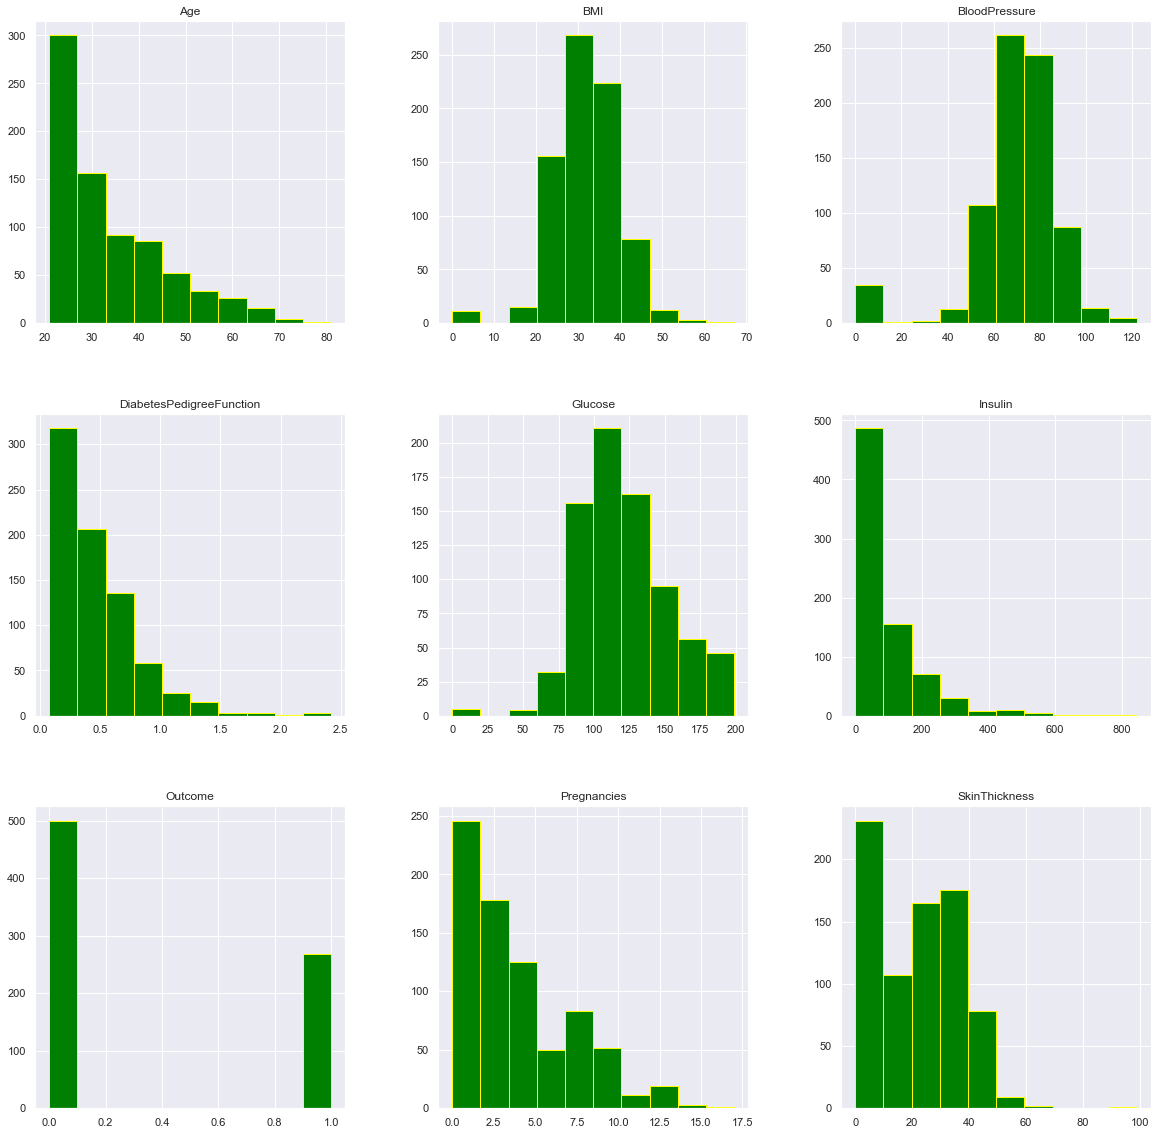

In [4]:
d = diabetes.hist(figsize = (20,20), color='green', edgecolor='yellow')

## Data Cleaning

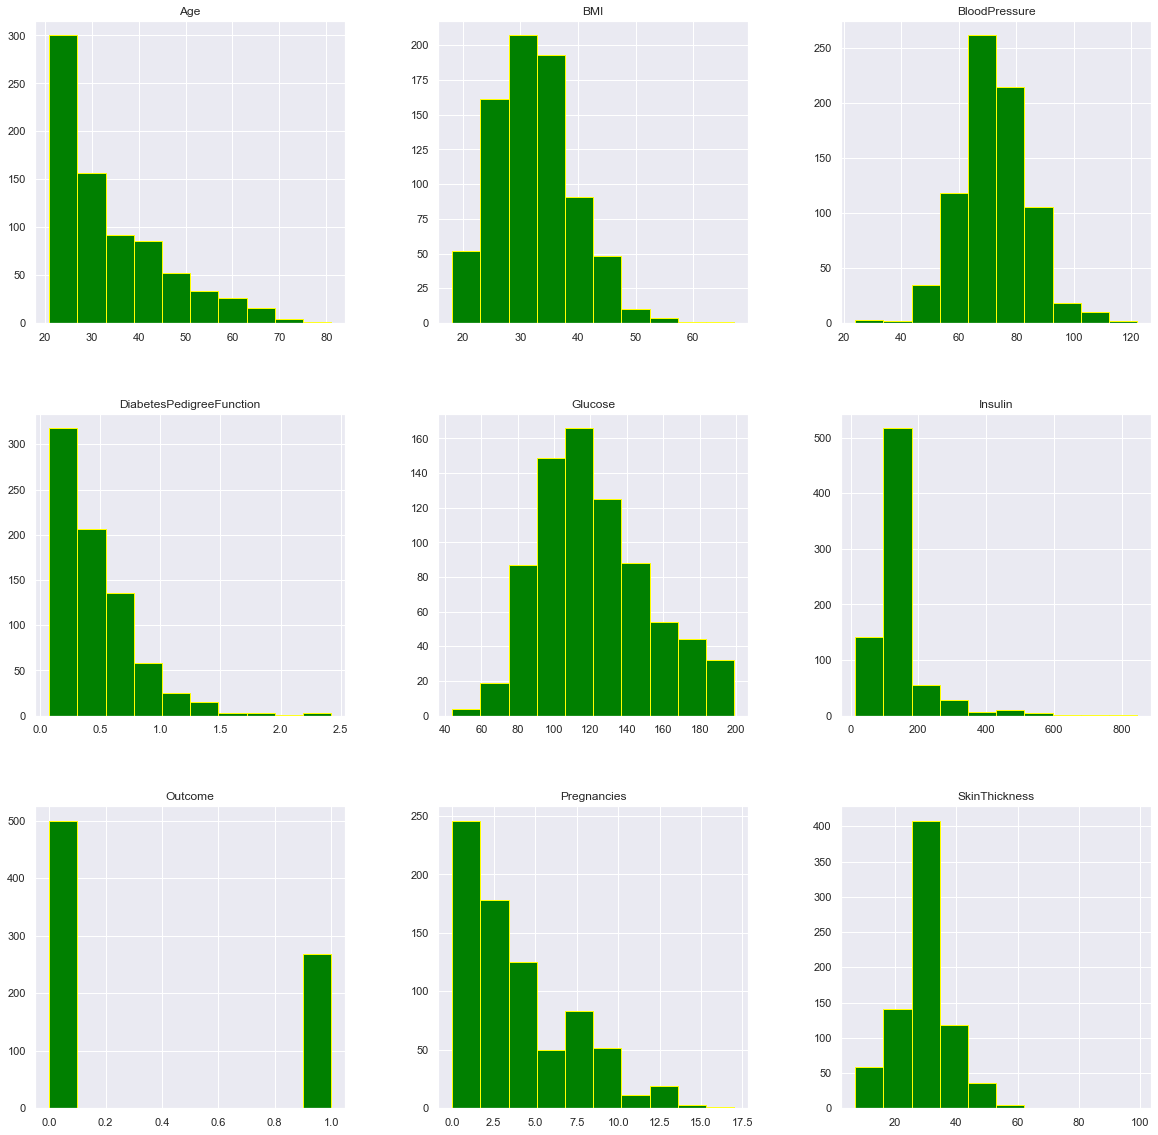

In [5]:
#replace zeros beacuse it might affect the outcome
replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in replace_zero:
    diabetes[column] = diabetes[column].replace(0, np.NaN) #replace 0 with no data
    mean = int(diabetes[column].mean(skipna=True)) #find the mean of the column
    diabetes[column] = diabetes[column].replace(np.NaN, mean) #replaces the NaN with mean
d = diabetes.hist(figsize = (20,20),color='green', edgecolor='yellow')

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

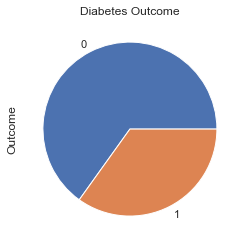

In [6]:
print(diabetes.Outcome.value_counts())
diabetes['Outcome'].value_counts().plot(kind='pie').set_title('Diabetes Outcome')

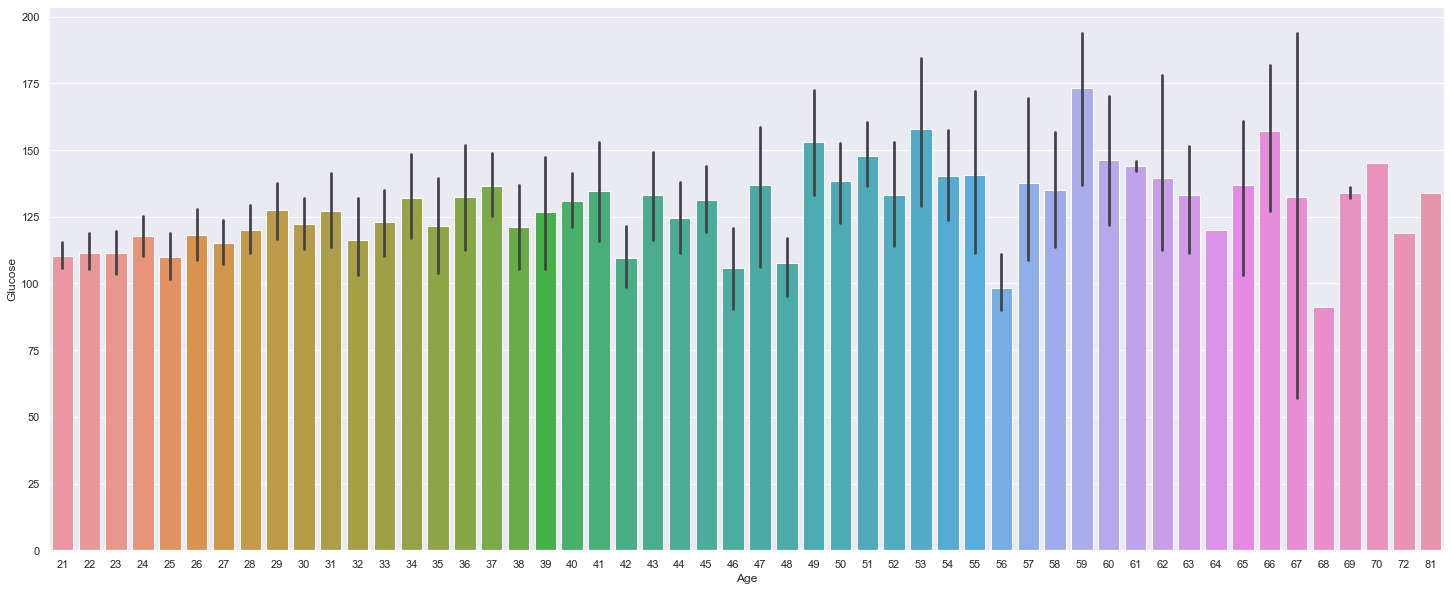

In [7]:
f, ax = plt.subplots(figsize= (25,10))
sns.barplot(x = diabetes['Age'], y = diabetes['Glucose'])

Text(0, 0.5, 'Age of Patient')

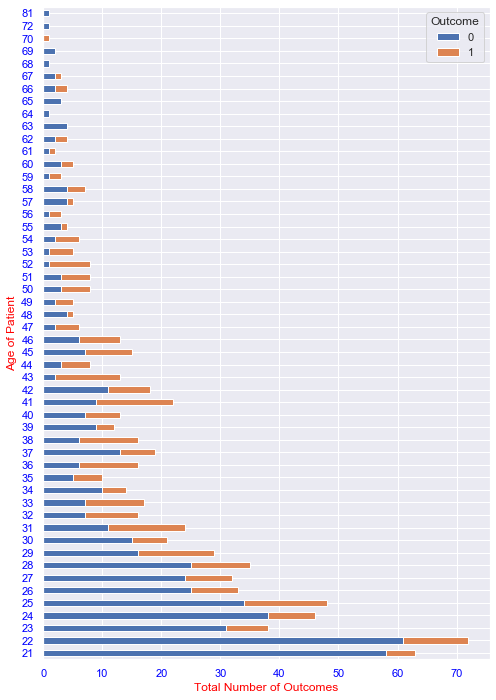

In [8]:
data_grouped = diabetes.groupby(['Age','Outcome'])['Outcome'].count().unstack()
data_grouped.plot(kind='barh', stacked=True, figsize= (8,12), edgecolor= 'white') 
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.xlabel('Total Number of Outcomes', color='red', fontsize=12)
plt.ylabel('Age of Patient', color='red', fontsize=12)

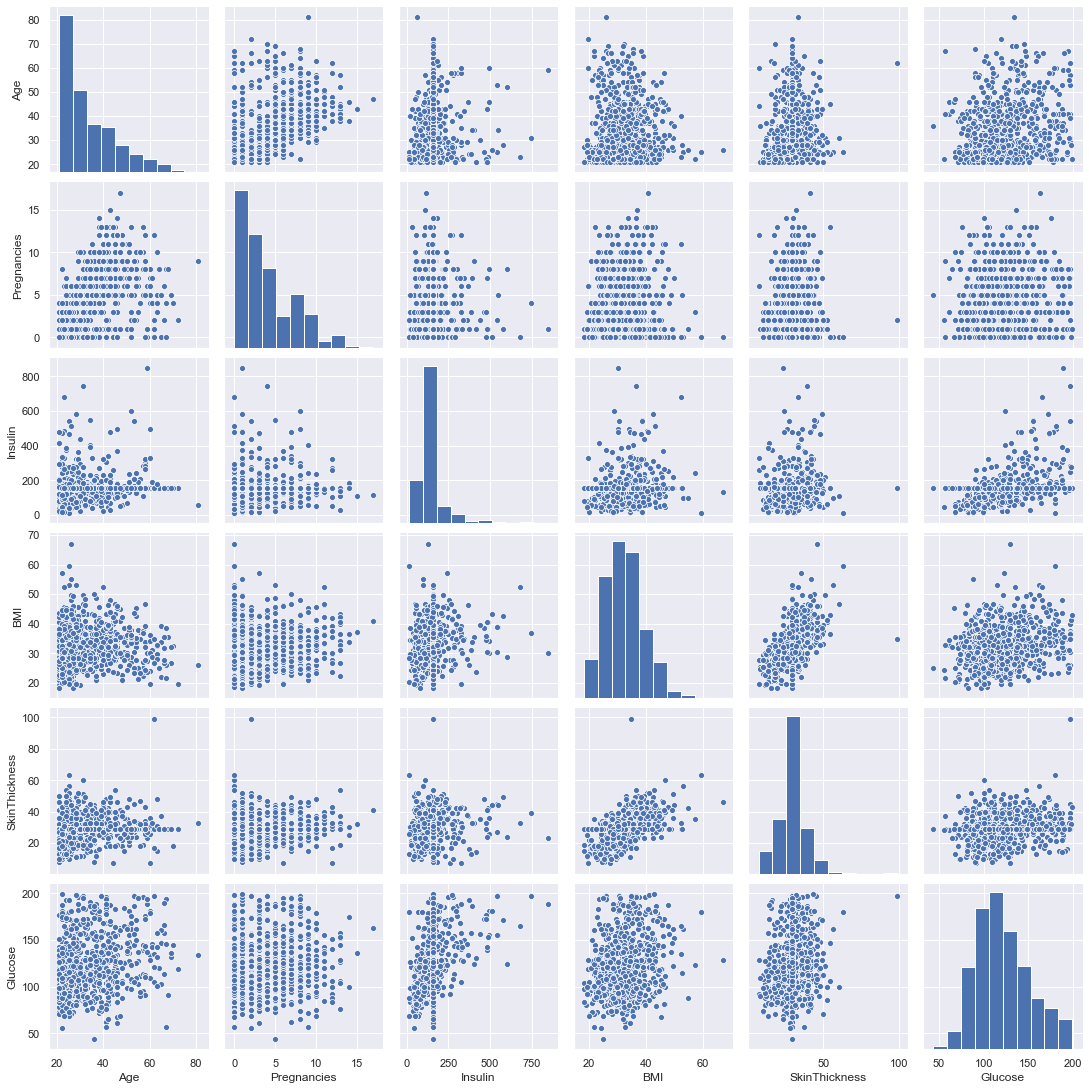

In [9]:
sns.pairplot(diabetes[['Age','Pregnancies','Insulin', 'BMI', 'SkinThickness', 'Glucose']])

# Feature Engineering

In [10]:
#split data
a = diabetes.iloc[:, 0:8]
b = diabetes.iloc[:, 8]
a_train, a_test, b_train, b_test = train_test_split(a, b, random_state=0,test_size=0.2)

In [11]:
#Standardize the data - Feature Scaling
sc_a = StandardScaler()
a_train = sc_a.fit_transform(a_train)
a_test = sc_a.transform(a_test)

# Building the model

In [12]:
#define the model
model=LogisticRegression()
model.fit(a_train,b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
b_pred=model.predict(a_test)

# Evaluation

In [14]:
cm=confusion_matrix(b_test,b_pred)
print(cm)

[[97 10]
 [19 28]]


In [15]:
print(accuracy_score(b_test, b_pred))

0.8116883116883117


In [16]:
print(f1_score(b_test, b_pred))

0.6588235294117647


In [17]:
#Save the model
pickle.dump(model,open('model.pkl','wb'))

In [18]:
model=pickle.load(open('model.pkl','rb'))